In [3]:
import numpy as np
import pandas as pd
from pprint import pprint

In [13]:
dataset = pd.read_csv('/content/drive/MyDrive/zoo.csv',
                      names=['hair','feathers','eggs','milk',
                                                   'airbone','aquatic','predator','toothed','backbone',
                                                  'breathes','venomous','fins','legs','tail','domestic','catsize','class',])#Özelllik isimleri ve label ismi yandaki gibi olacak şekilde tüm datayı okuduk
dataset

,hair,feathers,eggs,milk,airbone,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


Datasetteki veriler:

In [14]:
for i in dataset.columns:
    print(dataset[i].value_counts())#Burada datasetteki her bir özelliğin kaç farklı değeri ve onların kaç sayıda olduğunu gösterir.

0    58
1    43
Name: hair, dtype: int64
0    81
1    20
Name: feathers, dtype: int64
1    59
0    42
Name: eggs, dtype: int64
0    60
1    41
Name: milk, dtype: int64
0    77
1    24
Name: airbone, dtype: int64
0    65
1    36
Name: aquatic, dtype: int64
1    56
0    45
Name: predator, dtype: int64
1    61
0    40
Name: toothed, dtype: int64
1    83
0    18
Name: backbone, dtype: int64
1    80
0    21
Name: breathes, dtype: int64
0    93
1     8
Name: venomous, dtype: int64
0    84
1    17
Name: fins, dtype: int64
4    38
2    27
0    23
6    10
8     2
5     1
Name: legs, dtype: int64
1    75
0    26
Name: tail, dtype: int64
0    88
1    13
Name: domestic, dtype: int64
0    57
1    44
Name: catsize, dtype: int64
1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: class, dtype: int64


Feature Selection:

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel

embeded_lr_feature = []

embeded_lr_selector = SelectFromModel(LogisticRegression(penalty="l2"), max_features=5) #Logistic regression tabanlı feature selection modeli oluşturur.
embeded_lr_selector.fit(dataset[dataset.columns[:-1]], dataset['class'])#Modele datanı ve labelını vererek çalıştırır.
embeded_lr_support = embeded_lr_selector.get_support()#En iyi özellikleri seçer
embeded_lr_feature.append(dataset[dataset.columns[:-1]].loc[:,embeded_lr_support].columns.tolist())#En iyi özelliklerin isimlerini alır.

embeded_lr_feature

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[['feathers', 'toothed', 'backbone', 'breathes', 'tail']]

In [17]:
for i in dataset.columns[:-1]:
    if i != embeded_lr_feature[0][0] and i != embeded_lr_feature[0][1] and i != embeded_lr_feature[0][2] and i != embeded_lr_feature[0][3] and i != embeded_lr_feature[0][4]:#Datasetteki en iyi özellikler dışındaki tüm özellikleri siler.
        dataset = dataset.drop(i, axis=1)
dataset

,feathers,toothed,backbone,breathes,tail,class
0,0,1,1,1,0,1
1,0,1,1,1,1,1
2,0,1,1,0,1,4
3,0,1,1,1,0,1
4,0,1,1,1,1,1
...,...,...,...,...,...,...
96,0,1,1,1,1,1
97,0,0,0,1,0,6
98,0,1,1,1,1,1
99,0,0,0,1,0,7


Normalization: (Burada her biri iki class olduğu için değerler değişmedi.)

In [18]:
for i in dataset.columns[:-1]:
    dataset[i][:] = list(map(lambda x: ((x-min(dataset[i][:])) / (max(dataset[i][:]) - min(dataset[i][:]))) , dataset[i][:]))#Datasetteki tüm değerleri max-min normalization methoduyla(0-1 aralığına) normalize eder.
dataset

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,feathers,toothed,backbone,breathes,tail,class
0,0.0,1.0,1.0,1.0,0.0,1
1,0.0,1.0,1.0,1.0,1.0,1
2,0.0,1.0,1.0,0.0,1.0,4
3,0.0,1.0,1.0,1.0,0.0,1
4,0.0,1.0,1.0,1.0,1.0,1
...,...,...,...,...,...,...
96,0.0,1.0,1.0,1.0,1.0,1
97,0.0,0.0,0.0,1.0,0.0,6
98,0.0,1.0,1.0,1.0,1.0,1
99,0.0,0.0,0.0,1.0,0.0,7


Histogramlar:

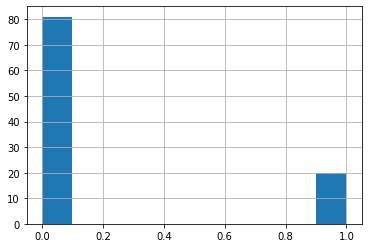

In [23]:
dataset['feathers'].hist()#feathers özelliğinin histogramını çizer.

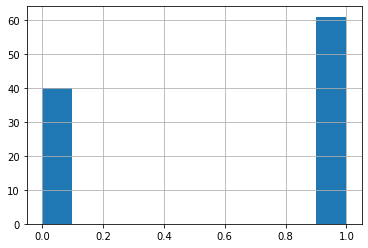

In [22]:
dataset['toothed'].hist()#toothed özelliğinin histogramını çizer.

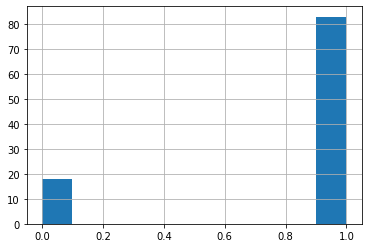

In [21]:
dataset['backbone'].hist()#backbone özelliğinin histogramını çizer.

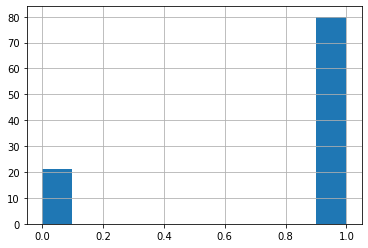

In [19]:
dataset['breathes'].hist()#breathes özelliğinin histogramını çizer.dataset['backbone'].hist()#safety özelliğinin histogramını çizer.

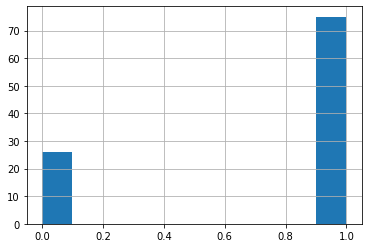

In [20]:
dataset['tail'].hist()#tail özelliğinin histogramını çizer.

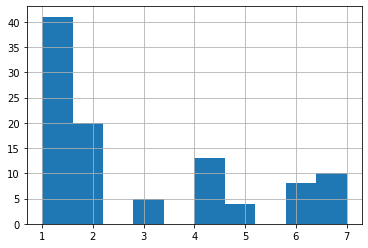

In [24]:
dataset['class'].hist()#class labelının histogramını çizer.

In [25]:
train_data = dataset.iloc[:int(dataset.shape[0]*80/100)].reset_index(drop=True)#Datanın %75 ini train yapıyoruz.
test_data = dataset.iloc[int(dataset.shape[0]*80/100):].reset_index(drop=True)#Datanın %25 sini test yapıyoruz.
train_data.shape, test_data.shape

((80, 6), (21, 6))

Entropy hesaplama:

In [26]:
def entropi(kolon):
    labellar, sayılar = np.unique(kolon, return_counts = True) # bir kolondaki farklı değerleri ve o değerlerin sayılarını bulur.
    entropy = 0
    #bu kolondaki toplam etropy'i hesaplar.
    for i in range(len(labellar)):
      entropy += (-sayılar[i] / np.sum(sayılar)) * np.log2(sayılar[i] / np.sum(sayılar)) # fonksiyonu her değer için tek tek uygulayıp toplar.
    return entropy

Bilgi kazancını hesaplama:

In [27]:
def bilgi_kazancı(data, özellik, label):
    data_entropi = entropi(data[label]) #label için entropy değerini hesaplar
    özellikler, özellik_sayıları = np.unique(data[özellik], return_counts = True)

    ağırlıklı_özellik_entropileri = 0
    # her bir label değeri için ağırlıklı olan entropi değerini bulup toplar
    for i in range(len(özellikler)):
        ağırlıklı_özellik_entropileri += (özellik_sayıları[i] / np.sum(özellik_sayıları)) * (entropi(data.where(data[özellik] == özellikler[i]).dropna()[label]))#labelların ağırlıklı entropi değerlerini bulur

    kazanc = data_entropi - ağırlıklı_özellik_entropileri #bilgi kazancını hesaplar

    return kazanc

Kara ağacını oluşturma fonksiyonu:

In [29]:
def karar_ağacı(data, gerçek_data, özellikler, label="class", ebeveyn = None):
    if len(np.unique(data[label])) <= 1:#Label sayısı 1 yada 1 den azsa ilk labelı döndürür.
        return np.unique(data[label])[0]

    elif len(data)==0:#Data boşsa en fazla sayıdaki labelı döndürür.
        return np.unique(gerçek_data[label])[np.argmax(np.unique(gerçek_data[label],return_counts=True)[1])]
    
    elif len(özellikler) ==0:#Hiç özellik yoksa ebeveynini döndürür.
        
        return ebeveyn
  
    else:
        ebeveyn = np.unique(data[label])[np.argmax(np.unique(data[label], return_counts=True)[1])]

        bilgi_kazancı_değerleri = []

        for özellik in özellikler:
            bilgi_kazancı_değerleri.append(bilgi_kazancı(data, özellik, label)) #Özelliklerin bilgi kazançlarını döndürür

        bilgi_kazancı_değerleri = np.array(bilgi_kazancı_değerleri)
        
        en_iyi_değer_indeksi = np.argmax(bilgi_kazancı_değerleri)#En iyi değerin indeksini bulur.
        
        en_iyi_değer = özellikler[en_iyi_değer_indeksi]#En iyi değeri bulur.

        ka_ağacı = {en_iyi_değer:{}}#En iyi özelliği karar ağacına ekler.

        geçici_array = []
        #Tüm özelliklerden en iyi özelliği çıkararak yeni özellikler array i oluşturur.
        for özellik in özellikler:
            if özellik != en_iyi_değer:
                geçici_array.append(özellik)
                
        özellikler = np.array(geçici_array)
        
        for değer in np.unique(data[en_iyi_değer]):

            alt_data = data.where(data[en_iyi_değer] == değer).dropna()#Datasetten en iyi özelliği çıkarıp yeni bir alt data oluşturur.
            
            alt_karar_ağacı = karar_ağacı(alt_data, gerçek_data, özellikler, label, ebeveyn)#Karar ağacı fonksiyonunu alt data için bir daha çağırır.
            
            ka_ağacı[en_iyi_değer][değer] = alt_karar_ağacı#Karar ağacına değerleri ekleyerek oluşturur.
            
        return ka_ağacı

In [30]:
k_ağacı = karar_ağacı(train_data, train_data, train_data.columns[:-1])#karar_ağacı fonksiyonunu çağırarak karar ağacını oluşturur.

Karar ağacını yazdırma:

In [31]:
pprint(k_ağacı)#Karar ağacını pprint() fonksiyonunu kullanarak yazdırır.

{'toothed': {0.0: {'feathers': {0.0: {'breathes': {0.0: 7.0,
                                                   1.0: {'tail': {0.0: 6.0,
                                                                  1.0: {'backbone': {0.0: 7.0,
                                                                                     1.0: 1.0}}}}}},
                                1.0: 2.0}},
             1.0: {'breathes': {0.0: {'feathers': {0.0: {'backbone': {1.0: {'tail': {1.0: 4.0}}}}}},
                                1.0: {'tail': {0.0: {'feathers': {0.0: {'backbone': {1.0: 1.0}}}},
                                               1.0: {'feathers': {0.0: {'backbone': {1.0: 1.0}}}}}}}}}}


Karar ağacına daha düzgün bir görünüş kazandırma:

In [32]:
def printTree(tree, d = 0):
    if (tree == None or len(tree) == 0):
        print("\t" * d, "-")
    else:
        for key, val in tree.items():#Bu döngüde karar ağacının her bir itemine tek tek bakarak itemin yerine göre boşluk veya parantez ekleyerek karar ağacına daha düzgün bir görüntü kazandırır.
            if (isinstance(val, dict)):
                print("\t" * d, key)
                printTree(val, d+1)
            else:
                print("\t" * d, key, str('(') , val , str(')'))

printTree(k_ağacı)

 toothed
	 0.0
		 feathers
			 0.0
				 breathes
					 0.0 ( 7.0 )
					 1.0
						 tail
							 0.0 ( 6.0 )
							 1.0
								 backbone
									 0.0 ( 7.0 )
									 1.0 ( 1.0 )
			 1.0 ( 2.0 )
	 1.0
		 breathes
			 0.0
				 feathers
					 0.0
						 backbone
							 1.0
								 tail
									 1.0 ( 4.0 )
			 1.0
				 tail
					 0.0
						 feathers
							 0.0
								 backbone
									 1.0 ( 1.0 )
					 1.0
						 feathers
							 0.0
								 backbone
									 1.0 ( 1.0 )


In [33]:
def tahmin(dizi, karar_ağacı):
    for anahtar in list(dizi.keys()):
        if anahtar in list(karar_ağacı.keys()):#Anahtarın karar ağacında olup olmadığına bakar.
            try:
                sonuç = karar_ağacı[anahtar][dizi[anahtar]]#Anahtarın karar ağacındaki yerini saptar.
            except:
                return -1

            if isinstance(sonuç, dict):
                return tahmin(dizi,sonuç)
            else:
                return sonuç

In [34]:
def test(data, k_ağacı):
    
    diziler = data.iloc[:,:-1].to_dict(orient = "records")#Yeni bir dizi oluşturarak datayı labeldan arındırır.
    
    tahmin_edilen = pd.DataFrame(columns=["tahmin_edilen"])#Tahmin değerlerini kaydetmek için bir dataframe oluşturur.
    
    for i in range(len(data)):
        tahmin_edilen.loc[i,"tahmin_edilen"] = tahmin(diziler[i], k_ağacı)#Tek tek datadaki her bir örneği tahmin eder.
         
    print('Tahmin doğruluğu = {}'.format(np.sum(tahmin_edilen["tahmin_edilen"] == data["class"])/len(data)))#Tahmin edilen labelları gerçek labellarla karşılaştırarak doğruluk oranını bulur.

In [35]:
test(test_data, k_ağacı)

Tahmin doğruluğu = 0.7142857142857143


In [39]:
tahmin({'feathers': 1, 'toothed': 0, 'backbone': 1, 'breathes': 0, 'tail': 0}, k_ağacı)

2.0